# Python Workshop in Text analysis: Introduction

In [3]:
from IPython.display import Image, display
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline


## Observations and variables
- A variable is any characteristics, number, or quantity that can be measured or counted: e.g. income, height, happiness
    - Numeric: Numbers
        - Continuous: Area, height, etc
        - Discrete: The rolls of a die, many answers in surveys, etc
        
    - Categorical: Categories
        - Ordinal: Can be ordered. E.g. "high", "middle" and "low" income countries
        - Nominal: Cannot be ordered. E.g. "blue", "red" and "yellow" 
        
- An observation is each of the values of a variable: e.g. 800, 1.93, 8, "middle"

In [2]:
Image(url="http://www.abs.gov.au/websitedbs/a3121120.nsf/4a256353001af3ed4b2562bb00121564/5869990518bbb7feca257b55002261e0/Body/3.109A!OpenElement&FieldElemFormat=gif")

## What is tidy data?
Based on: http://vita.had.co.nz/papers/tidy-data.pdf

Tidy data is a standard way of mapping the meaning of a dataset to its structure.  A dataset is
messy or tidy depending on how rows, columns and tables are matched up with observations,variables and types.  In
tidy data:
1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.

### Advantages: Facilitate manipulation, visualisation and modelling
- Combining tables (merging two tables by the year)
- Plotting (df["x"] vs df["y"])
- Statistical models ("y" ~ "x" + C("year"))
- Examples adapted from http://stat405.had.co.nz/lectures/18-tidy-data.pdf

In [82]:
%%html
<table>
    <tr> <th></th> <th>2010</th> <th>2015</th> </tr>
    <tr> <td>Male</td> <td>0</td> <td>5</td> </tr>
    <tr> <td>Female</td> <td>1</td> <td>4</td> </tr>
</table>

<h3>There are three variables in this data set.What are they? </h3> 


,2010,2015
Male,0,5
Female,1,4


In [83]:
%%html
<h3>Tidy data</h3> 
<table>
    <tr> <th>year</th> <th>sex</th> <th>count</th> </tr>
    <tr> <td>2010</td> <td>female</td> <td>4</td> </tr>
    <tr> <td>2010</td> <td>male</td> <td>5</td> </tr>
    <tr> <td>2015</td> <td>female</td> <td>1</td> </tr>
    <tr> <td>2015</td> <td>male</td> <td>0</td> </tr>
</table>

year,sex,count
2010,female,4
2010,male,5
2015,female,1
2015,male,0


### Tidying messy datasets
Real datasets can, and often do, violate the three precepts of tidy data in almost every way
imaginable. While occasionally you do get a dataset that you can start analysing immediately,
this is the exception,  not the rule:
- Column headers are values, not variable names --> Melt
- Multiple variables are stored in one column --> Pivot
- Variables are stored in both rows and columns --> Melt then pivot

Data to study: variations of https://stats.oecd.org/Index.aspx?DataSetCode=CITIES (which has problem 2)

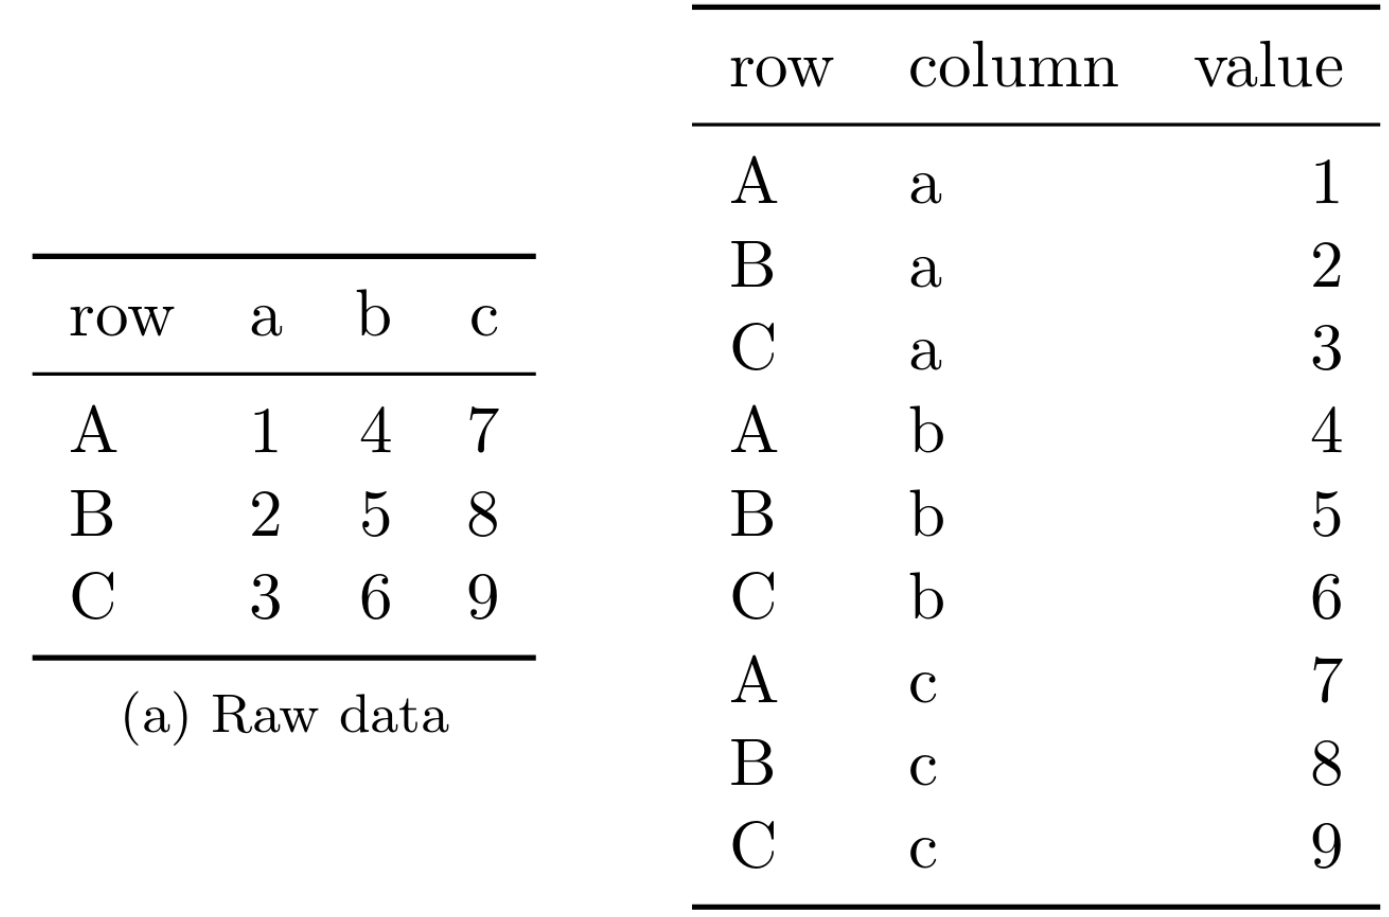

In [184]:
#Example of melting (columns to rows)
Image("figures/melt.png",width=400)

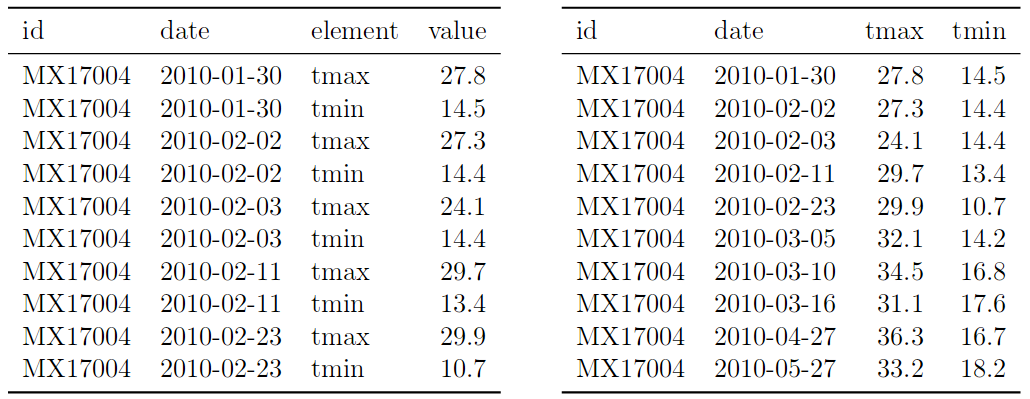

In [186]:
#Example of pivoting (rows to columns)
Image("figures/pivot.png",width=800)

### Column headers are values, not variable names: MELT

In [153]:
df = pd.read_csv("data/columns_headers.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,AT001,Vienna,267.27,269.90,272.56,275.26,277.99,280.75,283.54,286.38,289.24,292.15,295.09,298.07,301.08,304.14,307.23
1,1,AT002,Graz,179.92,181.59,183.28,185.01,186.76,188.55,190.36,192.20,194.07,195.97,197.91,199.87,201.87,203.90,205.96
2,2,AT003,Linz,165.29,165.94,166.60,167.27,167.94,168.62,169.31,170.00,170.70,171.41,172.12,172.84,173.57,174.31,175.05
3,3,AUS,Australia,2.47,2.50,2.53,2.56,2.59,2.62,2.65,2.70,2.76,2.82,2.86,2.90,2.95,3.00,3.05
4,4,AUS01,Sydney,332.15,335.48,338.18,340.38,342.20,344.88,348.04,353.71,360.58,367.35,372.51,376.88,382.38,388.94,395.83


In [154]:
### Fix
variables_already_presents = ['METRO_ID', 'Metropolitan areas']
columns_combine = ['2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013', '2014']
pd.melt(df,id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="POP_DENS").head()

,METRO_ID,Metropolitan areas,year,POP_DENS
0,AT001,Vienna,2000,267.27
1,AT002,Graz,2000,179.92
2,AT003,Linz,2000,165.29
3,AUS,Australia,2000,2.47
4,AUS01,Sydney,2000,332.15


### Multiple variables are stored in one column: PIVOT

In [48]:
df = pd.read_csv("data/multiple_variables.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,VAR,Variables,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,0,AT001,Vienna,POP_DENS,Population density (persons per km2),2000,2000,RATIO,Ratio,0,Units,NaN,NaN,267.27,NaN,NaN
1,1,AT001,Vienna,POP_DENS,Population density (persons per km2),2001,2001,RATIO,Ratio,0,Units,NaN,NaN,269.90,NaN,NaN
2,2,AT001,Vienna,POP_DENS,Population density (persons per km2),2002,2002,RATIO,Ratio,0,Units,NaN,NaN,272.56,NaN,NaN
3,3,AT001,Vienna,POP_DENS,Population density (persons per km2),2003,2003,RATIO,Ratio,0,Units,NaN,NaN,275.26,NaN,NaN
4,4,AT001,Vienna,POP_DENS,Population density (persons per km2),2004,2004,RATIO,Ratio,0,Units,NaN,NaN,277.99,NaN,NaN


In [49]:
### Fix
column_with_values = "Value"
column_to_split = ["VAR"]
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
df_fixed = df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split)
df_fixed.head()

VAR                               GREEN_AREA_PC  POP_DENS
METRO_ID Metropolitan areas Year                         
AT001    Vienna             2000         255.17    267.27
                            2001         252.68    269.90
                            2002         250.22    272.56
                            2003         247.77    275.26
                            2004         245.34    277.99

In [50]:
#use .reset_index() to convert index to columns
df_fixed.reset_index().head()

VAR,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,AT001,Vienna,2000,255.17,267.27
1,AT001,Vienna,2001,252.68,269.90
2,AT001,Vienna,2002,250.22,272.56
3,AT001,Vienna,2003,247.77,275.26
4,AT001,Vienna,2004,245.34,277.99


### Variables are stored in both rows and columns: MELT then PIVOT

In [179]:
df = pd.read_csv("data/multiple_variables_and_headers.csv")
df.head()

,Unnamed: 0,METRO_ID,Metropolitan areas,VAR,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,AT001,Vienna,GREEN_AREA_PC,255.17,252.68,250.22,247.77,245.34,242.92,240.53,238.15,235.79,233.44,231.12,228.81,226.52,224.24,221.99
1,1,AT001,Vienna,POP_DENS,267.27,269.90,272.56,275.26,277.99,280.75,283.54,286.38,289.24,292.15,295.09,298.07,301.08,304.14,307.23
2,2,AT002,Graz,GREEN_AREA_PC,997.39,988.23,979.10,969.96,960.85,951.75,942.72,933.67,924.67,915.69,906.73,897.83,888.95,880.11,871.29
3,3,AT002,Graz,POP_DENS,179.92,181.59,183.28,185.01,186.76,188.55,190.36,192.20,194.07,195.97,197.91,199.87,201.87,203.90,205.96
4,4,AT003,Linz,GREEN_AREA_PC,1791.92,1784.87,1777.80,1770.71,1763.59,1756.49,1749.38,1742.23,1735.10,1727.91,1720.77,1713.59,1706.40,1699.20,1691.99


In [168]:
### Fix setp 1
variables_already_presents = ['METRO_ID', 'Metropolitan areas','VAR']
columns_combine = ['2000', '2001', '2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012', '2013', '2014']
df = pd.melt(df,id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="Value")
df.head()

,METRO_ID,Metropolitan areas,VAR,Year,Value
0,AT001,Vienna,GREEN_AREA_PC,2000,255.17
1,AT001,Vienna,POP_DENS,2000,267.27
2,AT002,Graz,GREEN_AREA_PC,2000,997.39
3,AT002,Graz,POP_DENS,2000,179.92
4,AT003,Linz,GREEN_AREA_PC,2000,1791.92


In [170]:
### Fix step 2
column_with_values = "Value"
column_to_split = ["VAR"]
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split).reset_index().head()

VAR,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,AT001,Vienna,2000,255.17,267.27
1,AT001,Vienna,2001,252.68,269.90
2,AT001,Vienna,2002,250.22,272.56
3,AT001,Vienna,2003,247.77,275.26
4,AT001,Vienna,2004,245.34,277.99


### It makes things easy

### Concatenate files (add more observations)

In [23]:
#Add more observations
Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png")

In [30]:
madrid = pd.read_csv("data/mad_twovariables.csv").head(2)
amsterdam = pd.read_csv("data/ams_twovariables.csv").head(2)
print(madrid)
print(amsterdam)



  METRO_ID Metropolitan areas  Year  GREEN_AREA_PC  POP_DENS
0    ES001             Madrid  2000           31.5    471.88
1    ES001             Madrid  2001           31.0    479.60
  METRO_ID Metropolitan areas  Year  GREEN_AREA_PC  POP_DENS
0    NL002          Amsterdam  2000         235.63    764.71
1    NL002          Amsterdam  2001         233.57    771.45


In [31]:
combined = pd.concat([madrid,amsterdam])
combined

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,ES001,Madrid,2000,31.50,471.88
1,ES001,Madrid,2001,31.00,479.60
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45


### MERGE DATASETS 

In [192]:
Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key.png",width=700)

In [33]:
ams_green = pd.read_csv("data/ams_green.csv")
ams_pop = pd.read_csv("data/ams_popdens.csv")
print(ams_green.head(2))
print(ams_pop.head(2))

  METRO_ID Metropolitan areas  Year  GREEN_AREA_PC
0    NL002          Amsterdam  2000         235.63
1    NL002          Amsterdam  2001         233.57
  METRO_ID Metropolitan areas  Year  POP_DENS
0    NL002          Amsterdam  2000    764.71
1    NL002          Amsterdam  2001    771.45


In [36]:
combined = pd.merge(ams_green,ams_pop,
         left_on=["METRO_ID","Metropolitan areas","Year"],
         right_on=["METRO_ID","Metropolitan areas","Year"],
         how="inner")
combined.head()

,METRO_ID,Metropolitan areas,Year,GREEN_AREA_PC,POP_DENS
0,NL002,Amsterdam,2000,235.63,764.71
1,NL002,Amsterdam,2001,233.57,771.45
2,NL002,Amsterdam,2002,231.51,778.30
3,NL002,Amsterdam,2003,229.46,785.26
4,NL002,Amsterdam,2004,227.41,792.34


In [201]:
print("Inner join pd.merge(left_df,right_df,how=\"inner\")")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_inner.png"))
print("Right join pd.merge(left_df,right_df,how=\"right\")", "The same with left")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_right.png"))
print("Outer join pd.merge(left_df,right_df,how=\"outer\")")
display(Image(url="http://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_outer.png"))

Inner join pd.merge(left_df,right_df,how="inner")


Right join pd.merge(left_df,right_df,how="right") The same with left


Outer join pd.merge(left_df,right_df,how="outer")


In [ ]:
"data/CITIES_19122016195113034.csv"

### In-class assignment
- Read the two dataframes: "data/green_area_pc.csv" and "data/pop_dens.csv"
- Check their heads
- Merge them
- Create a new variable measuring the densitiy of green area (m^2 green)/(m^2 city). Think that the green_area_pc is (m^2 green)/population and pop_dens is population/(km^2 city)
- Sort the dataset by this new variable (.sort_values(by= ,ascending=)) to find the city with the largest fraction of green area.
- Sort the dataset by this new variable (.sort_values(by= ,ascending=)) to find the city with the lowest fraction of green area. use (.dropna() if needed)
- Keep the Metropolitan areas "Vienna" and "Graz"

- Make a plot (choose the appropriate type) of year vs this new variable

### In-class assignment
- Read the data from "data/CITIES_19122016195113034.csv"
```
df = pd.read_csv("data/CITIES_19122016195113034.csv",sep="\t")
```
- Check the head
- Fix the column names
```
cols = list(df.columns)
cols[0] = "METRO_ID"
df.columns = cols
df.head()
```

- Fix the format
```
column_with_values = "Value"
column_to_split = ["VAR"]
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
df_fixed = df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split)
df_fixed = df_fixed.reset_index()
```

- Discuss how to visualize labour productivity, unemployment rates and year

- Sort the dataset by this new variable (.sort_values(by= ,ascending=)) to find the city with the largest fraction of green area.
- Sort the dataset by this new variable (.sort_values(by= ,ascending=)) to find the city with the lowest fraction of green area. use (.dropna() if needed)
- Keep the Metropolitan areas "Vienna" and "Graz"

- Make a plot (choose the appropriate type) of year vs this new variable

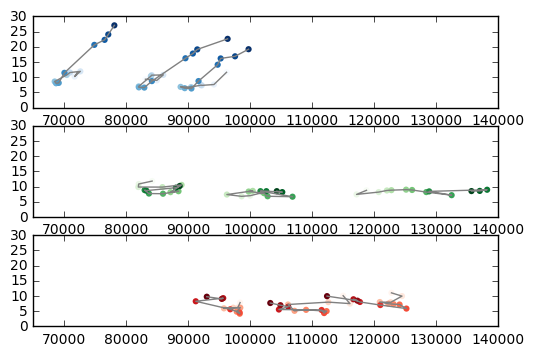

In [215]:
plt.subplot(3,1,1)

for cit,gr in df_fixed.loc[df_fixed["Metropolitan areas"].isin(["Valencia","Madrid","Barcelona"])].groupby("Metropolitan areas"):
    plt.plot(gr["LABOUR_PRODUCTIVITY"],gr["UNEMP_R"],color="gray")
    plt.scatter(gr["LABOUR_PRODUCTIVITY"],gr["UNEMP_R"],c=gr["Year"],edgecolor="none",label=cit,cmap="Blues")
    plt.xlim((65000,140000))
    plt.ylim((0,30))    

plt.subplot(3,1,2)
for cit,gr in df_fixed.loc[df_fixed["Metropolitan areas"].isin(["Paris","Lyon","Bordeaux"])].groupby("Metropolitan areas"):
    plt.plot(gr["LABOUR_PRODUCTIVITY"],gr["UNEMP_R"],color="gray")
    plt.scatter(gr["LABOUR_PRODUCTIVITY"],gr["UNEMP_R"],c=gr["Year"],edgecolor="none",label=cit,cmap="Greens")
    plt.xlim((65000,140000))
    plt.ylim((0,30))
    
plt.subplot(3,1,3)
for cit,gr in df_fixed.loc[df_fixed["Metropolitan areas"].isin(["Rome","Turin","Genova"])].groupby("Metropolitan areas"):
    plt.plot(gr["LABOUR_PRODUCTIVITY"],gr["UNEMP_R"],color="gray")
    plt.scatter(gr["LABOUR_PRODUCTIVITY"],gr["UNEMP_R"],c=gr["Year"],edgecolor="none",label=cit,cmap="Reds")
   
    plt.xlim((65000,140000))
    plt.ylim((0,30))

# Why do we get those results? 

In [ ]:
dealing with missing
.dropna
.replace
x[np.isfinite(x)]

In [ ]:
replace and apply methods

In [ ]:
groupbby

In [218]:
df = pd.read_csv("data/CITIES_19122016195113034.csv",sep="\t")

cols = list(df.columns)
cols[0] = "METRO_ID"
df.columns = cols
df.head()

column_with_values = "Value"
column_to_split = ["VAR"]
variables_already_present = ["METRO_ID","Metropolitan areas","Year"]
df_fixed = df.pivot_table(column_with_values,
             variables_already_present,
             column_to_split)
df_fixed = df_fixed.reset_index()


In [232]:
df_fixed2 = df_fixed.dropna(subset=["LABOUR_PRODUCTIVITY","UNEMP_R"])

In [233]:
%matplotlib inline
import seaborn as sns

In [234]:
x = df_fixed2["LABOUR_PRODUCTIVITY"]
y = df_fixed2["UNEMP_R"]

/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


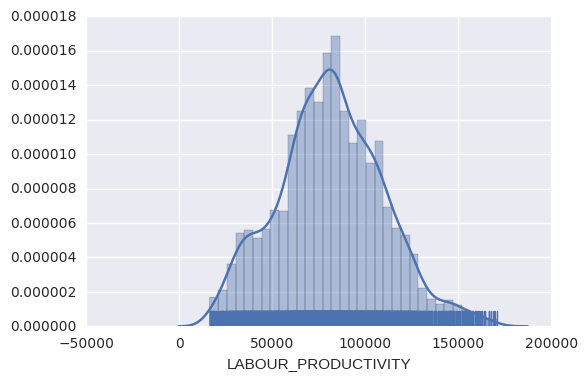

In [235]:
sns.distplot(x, kde=True, rug=True)

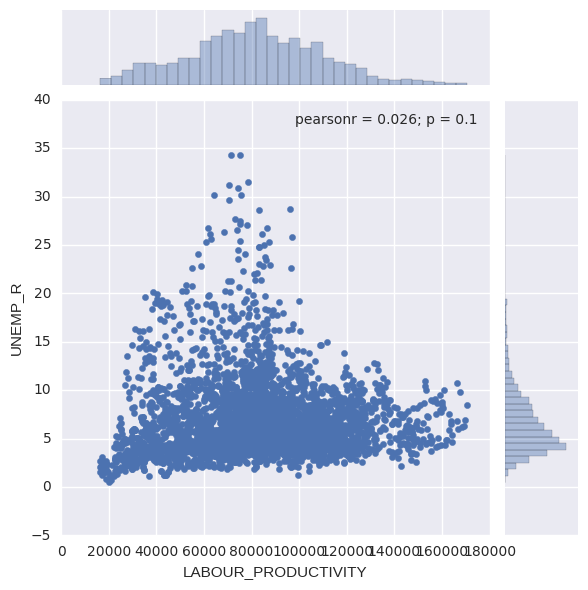

In [238]:
sns.jointplot(x="LABOUR_PRODUCTIVITY", y="UNEMP_R", data=df_fixed);

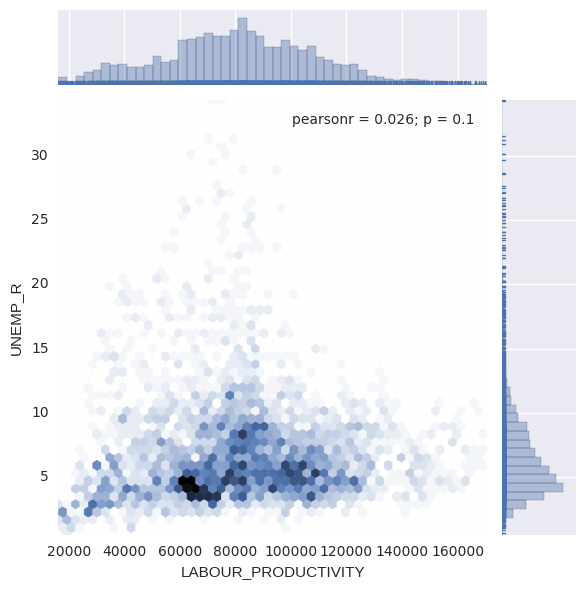

In [240]:
sns.jointplot(x="LABOUR_PRODUCTIVITY", y="UNEMP_R", data=df_fixed,kind="hex",
              marginal_kws=dict(bins=50, rug=True))

In [ ]:
Bar

In [28]:
import seaborn as sns
sns

<module 'seaborn' from '/home/shared/anaconda3/lib/python3.5/site-packages/seaborn/__init__.py'>

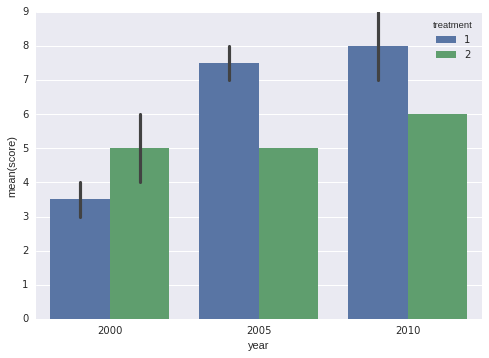

In [71]:
sns.barplot(x="year",y="score",hue="treatment",data=csvFrame,edgecolor="none")

In [97]:
plt.bar?

([<matplotlib.axis.XTick at 0x7f93a9e0d908>,
 <a list of 3 Text xticklabel objects>)

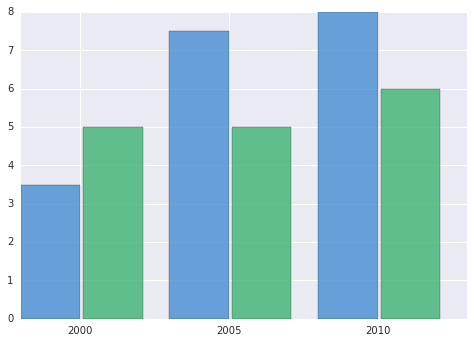

In [138]:
i = 0
for year, frame in csvFrame.groupby("year"):
    i += 1
    tr1 = np.mean(frame.loc[frame["treatment"]==1,"score"])
    tr2 = np.mean(frame.loc[frame["treatment"]==2,"score"])
    
    plt.bar(i,height = tr1,width=0.4,color=(70/255,140/255,210/255),edgecolor="none",alpha=0.8)
    plt.bar(i+0.42,height = tr2,width=0.4,color=(60/255,179/255,113/255),edgecolor="none",alpha=0.8)

plt.xticks([1.4,2.4,3.4],["2000","2005","2010"])

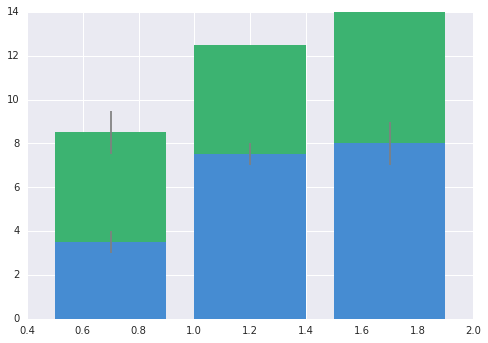

In [103]:
i = 0
for year, frame in csvFrame.groupby("year"):
    i += 0.5
    tr1 = np.mean(frame.loc[frame["treatment"]==1,"score"])
    e_tr1 = np.std(frame.loc[frame["treatment"]==1,"score"])
    tr2 = np.mean(frame.loc[frame["treatment"]==2,"score"])
    e_tr2 = np.std(frame.loc[frame["treatment"]==2,"score"])
    
    plt.bar(i,height = tr1,width=0.4,color=(70/255,140/255,210/255),edgecolor="none",yerr=e_tr1,ecolor="gray")
    plt.bar(i,height = tr2,bottom=tr1,width=0.4,color=(60/255,179/255,113/255),edgecolor="none",yerr=e_tr2,ecolor="gray")

In [ ]:
Parallel coordinates

In [241]:
from pandas.tools.plotting import parallel_coordinates
import pandas as pd

In [13]:
csvFrame = pd.read_csv("../class1/data/class1_test_csv.csv",sep="\t",index_col=None,skiprows=4,na_values=["-9"])

In [22]:
csvFrame["happiness"] = [1,2,3,4,5,6,7,8,9,10,11,12]

In [270]:

df_fixed2["C"] = df_fixed2["METRO_ID"].apply(lambda x: x[:2] if isinstance(x,str) else "")
df_fixed3 = df_fixed2.loc[df_fixed2["C"].isin(["IT"])]

/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [281]:
d_city2regio = {"Bari": "S",
"Bologna": "C",
"Catania": "S",
"Florence": "C",
"Genova": "N",
"Milan": "N",
"Naples": "S",
"Palermo": "S",
"Rome": "C",
"Turin": "N",
"Venice": "N"}
df_fixed3["Area"] = df_fixed3["Metropolitan areas"].apply(lambda x: d_city2regio.get(x))

/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [292]:
df_fixed3.columns

Index(['METRO_ID', 'Metropolitan areas', 'Year', 'CO2_PC', 'ENTROPY_1000M',
       'EQU_HOU_DISP_INC', 'GDP_PC', 'GINI_INC', 'GREEN_AREA_PC',
       'LABOUR_PRODUCTIVITY', 'PCT_INTENSITY', 'POP_DENS', 'SPRAWL', 'UNEMP_R',
       'C', 'Area'],
      dtype='object', name='VAR')

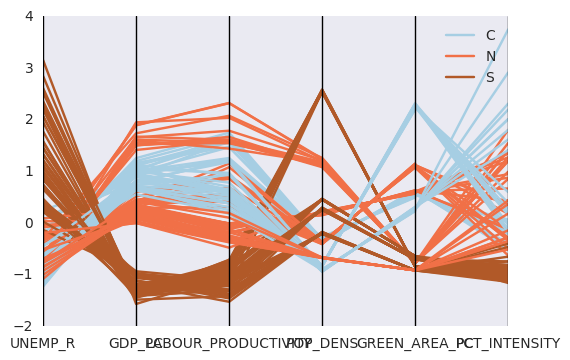

In [312]:
cols = ["UNEMP_R",'GDP_PC',"LABOUR_PRODUCTIVITY","POP_DENS","GREEN_AREA_PC",'PCT_INTENSITY']
#for c in cols: df_fixed3[c] = (df_fixed3[c]- np.mean(df_fixed3[c]))/np.std(df_fixed3[c]) 

parallel_coordinates(df_fixed3.loc[(df_fixed3["Metropolitan areas"] !="Italy")],"Area",cols=cols,colormap="Paired")

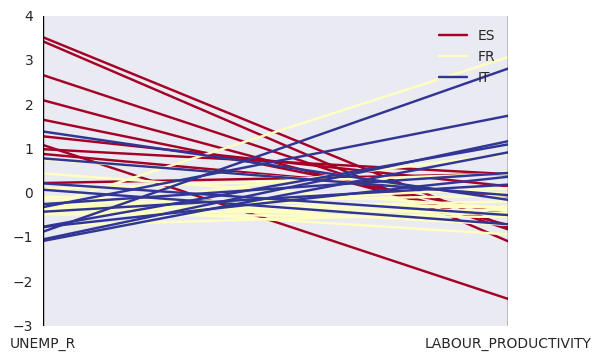

In [269]:
parallel_coordinates(df_fixed3.loc[df_fixed3["Year"]==2010],"C",cols=["UNEMP_R","LABOUR_PRODUCTIVITY"],colormap="RdYlBu")